In [1]:
# From https://mathoverflow.net/questions/19404/approximation-of-a-normal-distribution-function
# Last answer.
var('phix')

# This is a "bad" approximation - but it might be enough for us.
eq = phix == 1/(1+exp(x))
sol = solve(eq, x)
sol

[x == log(1/phix - 1)]

In [2]:
# We need the inverse of this to get the desired shape.
rhs = sol[0].rhs()
rhs # this is our approximator function

log(1/phix - 1)

(1.3374922084896001e-13)*(x - 0.5)^10 + 33.46405228758171*(x - 0.5)^9 + 10.756302521008406*(x - 0.5)^7 + 3.7647058823529416*(x - 0.5)^5 + 1.5686274509803924*(x - 0.5)^3 + 1.1764705882352942*x - 0.5882352941176471


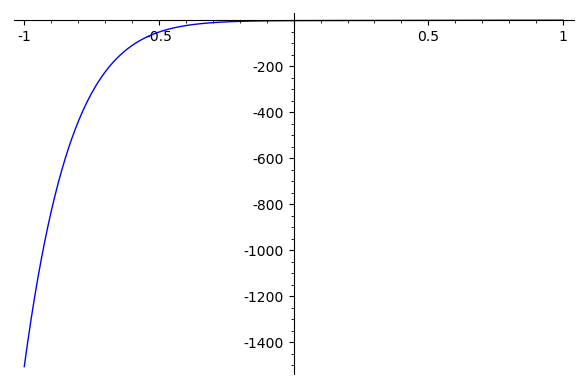

In [100]:
# Taylor expansion might be usefull for faster computation.

# NOTE: Only half of the Taylor series is nice -> we should probably mirror the nice half
deg = 10
cent = 0.5
fast_approx = -taylor(rhs.subs(phix==x), x, cent, deg)/3.4
print(fast_approx)
plot(fast_approx)

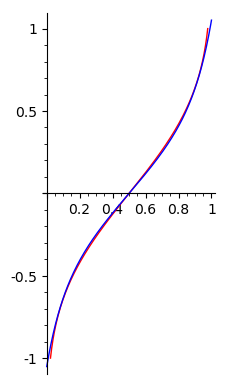

In [102]:
# Comparison with the "real" normal CDF.
T = RealDistribution('gaussian', 0.5)
p1 = parametric_plot((T.cum_distribution_function, x), (x, -1, 1), color="red")
# parametric_plot is used to plot the inverse.
p2 = plot(fast_approx, xmin=0)
p1 + p2

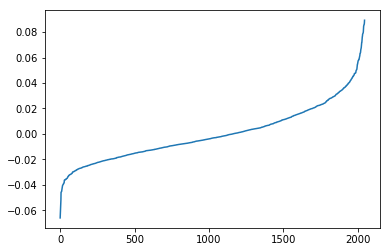

In [103]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
weights = np.load(os.path.expanduser('~/tmp/nnc_weights/inceptionv3_312_dense_2048x1000.npy'))
a = np.argsort(weights, axis=0)
norms = np.linalg.norm(weights, axis=0)
sorted_weights = np.take_along_axis(weights, a, axis=0) / norms
y_target = sorted_weights[:, 0]
plt.plot(y_target)
plt.show()

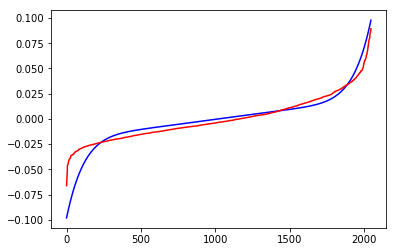

In [104]:
x_length, y_min, y_max = y_target.shape[0], y_target.min(), y_target.max()

span = 1
x_np = np.linspace(-span, span, x_length)
y = np.array(map(fast_approx, x_np * x_length))
y *= (y_max - y_min) / y.max() / 2
y += x_np * 0.02

plt.plot(y, color='b') + \
plt.plot(y_target, color='r')
plt.show()

y min/max -2.365153216143072e+21 2.2357858534171943e+21
t min/max -0.369661480188 0.19008000195


/usr/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:17: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


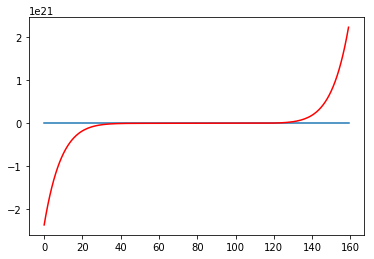

In [106]:
# uses fast_approx

def approx(t):
    x_dim = t.shape[0]
    x = np.linspace(-1, 1, x_dim)
    y = np.array(map(fast_approx, x * x_dim))
    #y *= (t.max() - t.min()) / 200
    print('y min/max {} {}'.format(y.min(), y.max()))
    print('t min/max {} {}'.format(t.min(), t.max()))
    return y


def comp(weights, col):
    a = np.argsort(weights, axis=0)
    norms = np.linalg.norm(weights, axis=0)
    sorted_weights = np.take_along_axis(weights, a, axis=0) / norms
    y_target = sorted_weights[:, col]
    plt.plot(y_target)
    y_approx = approx(y_target)
    plt.plot(y_approx, color='r')
    plt.show()


def get_data(i):
    pat = os.path.expanduser('~/tmp/nnc_weights/' + '*')
    filenames = glob(pat)
    return np.load(filenames[i])


def proc(i, j):
    w = get_data(i)
    comp(w, j)
    
proc(0, 1)
